## Calculate pre-match $p_0$ for each match in Wimbledon

In [8]:
%run '/Users/noahjillson/Desktop/MCM/source/notebooks/prematch_calculations.ipynb'

0.6267299999999998 0.7444099999999999 0.5236600000000002 0.26203000000000004 0.48307
0.6620106475 0.34453760080000007 1.0065482483000001
{('Jannik Sinner', 'Novak Djokovic'): [0.5782509008, 0.6231509008], ('Carlos Alcaraz', 'Novak Djokovic'): [0.5801509007999999, 0.6106163008000001], ('Jannik Sinner', 'Quentin Halys'): [0.6682509008, 0.5961509007999999], ('Lorenzo Musetti', 'Hubert Hurkacz'): [0.6213509008, 0.6397509008], ('Daniil Medvedev', 'Jiri Lehecka'): [0.6539163008, 0.5802855008], ('Daniil Medvedev', 'Marton Fucsovics'): [0.6239163008, 0.5688855008], ('Grigor Dimitrov', 'Holger Rune'): [0.6013566008, 0.6195836008], ('Andrey Rublev', 'Alexander Bublik'): [0.6537490008000001, 0.5942855008000001], ('Carlos Alcaraz', 'Holger Rune'): [0.5965566008, 0.5833163008], ('Jannik Sinner', 'Daniel Elahi Galan'): [0.6319836008, 0.5621509008], ('Daniel Elahi Galan', 'Mikael Ymer'): [0.5696163008, 0.5686836008], ('Hubert Hurkacz', 'Novak Djokovic'): [0.5997509007999999, 0.6731509008000001], ('Al

## Defining the Model

In [483]:
# At the moment, this model is a placeholder. It likely needs to be learned using Gradient Descent
# Optimization of this type would be outside the scope of this notebook. It will later be addressed
# and an optimal value for n should be imported
n = 100
player_numbers = [1, 2]

#### Sub Functions 

In [484]:
# Weight function that determines how heavility weighted the pre-match predictions are favored
# compared to the in-match predictions calculated from score_seq
def theta(score_seq):
    return n / (n + len(score_seq))

In [485]:
# The percentage of points won on serve give the current score sequence
def p_bar(score_seq, i):
    serving_seq = filter(lambda x: x['server'] == str(i), score_seq)
    won_serving_seq = filter(lambda x: x['point_victor'] == str(i), filter(lambda x: x['server'] == str(i), score_seq))
    d = len(list(serving_seq))
    n = len(list(won_serving_seq))
    if (d == 0):
        return 0
    # print("p_bar:", n/d, d, n)
    return (n/d) # points won on serve / points served)

#### The Model

In [486]:
def dynamic_model(score_seq, p0, i):
    print(theta(score_seq))
    return theta(score_seq) * p0 + (1 - theta(score_seq)) * p_bar(score_seq, i)

## Converting match data to score sequences

In [487]:
sequences = dict()
for m in matches:
    sequences[m] = []
    for r in all_points:
        if r['player1'] == m[0] and r['player2'] == m[1]:
            sequences[m].append(r)

In [488]:
for s in sequences:
    for p in player_numbers:
        for m in range(1,len(sequences[s])):
            dynamic_model(sequences[s][:m], p_dict[s][p - 1], p)
        

0.9900990099009901
0.9803921568627451
0.970873786407767
0.9615384615384616
0.9523809523809523
0.9433962264150944
0.9345794392523364
0.9259259259259259
0.9174311926605505
0.9090909090909091
0.9009009009009009
0.8928571428571429
0.8849557522123894
0.8771929824561403
0.8695652173913043
0.8620689655172413
0.8547008547008547
0.847457627118644
0.8403361344537815
0.8333333333333334
0.8264462809917356
0.819672131147541
0.8130081300813008
0.8064516129032258
0.8
0.7936507936507936
0.7874015748031497
0.78125
0.7751937984496124
0.7692307692307693
0.7633587786259542
0.7575757575757576
0.7518796992481203
0.746268656716418
0.7407407407407407
0.7352941176470589
0.7299270072992701
0.7246376811594203
0.7194244604316546
0.7142857142857143
0.7092198581560284
0.704225352112676
0.6993006993006993
0.6944444444444444
0.6896551724137931
0.684931506849315
0.6802721088435374
0.6756756756756757
0.6711409395973155
0.6666666666666666
0.6622516556291391
0.6578947368421053
0.6535947712418301
0.6493506493506493
0.6451

In [489]:
len(list(filter(lambda x: x['server'] == str(2), sequences[('Jannik Sinner', 'Novak Djokovic')][:11] )))

10

In [490]:
sinner_v_djokovic = ('Jannik Sinner', 'Novak Djokovic')
print(p_dict[sinner_v_djokovic])

p_rally_sinner = []
p_rally_djokovic = []
for m in range(1,len(sequences[sinner_v_djokovic])):
    p_rally_sinner.append(dynamic_model(sequences[sinner_v_djokovic][:m], p_dict[sinner_v_djokovic][0], 1))
    p_rally_djokovic.append(dynamic_model(sequences[sinner_v_djokovic][:m], p_dict[sinner_v_djokovic][1], 2))

print(p_rally_sinner)
print(p_rally_djokovic)


[0.5782509008, 0.6231509008]
0.9900990099009901
0.9900990099009901
0.9803921568627451
0.9803921568627451
0.970873786407767
0.970873786407767
0.9615384615384616
0.9615384615384616
0.9523809523809523
0.9523809523809523
0.9433962264150944
0.9433962264150944
0.9345794392523364
0.9345794392523364
0.9259259259259259
0.9259259259259259
0.9174311926605505
0.9174311926605505
0.9090909090909091
0.9090909090909091
0.9009009009009009
0.9009009009009009
0.8928571428571429
0.8928571428571429
0.8849557522123894
0.8849557522123894
0.8771929824561403
0.8771929824561403
0.8695652173913043
0.8695652173913043
0.8620689655172413
0.8620689655172413
0.8547008547008547
0.8547008547008547
0.847457627118644
0.847457627118644
0.8403361344537815
0.8403361344537815
0.8333333333333334
0.8333333333333334
0.8264462809917356
0.8264462809917356
0.819672131147541
0.819672131147541
0.8130081300813008
0.8130081300813008
0.8064516129032258
0.8064516129032258
0.8
0.8
0.7936507936507936
0.7936507936507936
0.7874015748031497


### Calculate $\hat{p}(S_m)$ for each match

In [491]:
for key in p_dict:
    p_hats = []
    for m in range(1,len(sequences[key])):
        p_hats.append({key[0] : dynamic_model(sequences[key][:m], p_dict[key][0], 1), key[1] : dynamic_model(sequences[key][:m], p_dict[key][1], 2)})
    
    p1 = key[0].replace(' ', '_')
    p2 = key[1].replace(' ', '_')
    p_hat_fieldnames = [key[0], key[1]]

    with open(f'/Users/noahjillson/Desktop/MCM/data/p_hat_by_match/{p1}_vs_{p2}.csv', mode="w", newline='') as file:
            writer = csv.DictWriter(file, fieldnames=p_hat_fieldnames)
            writer.writeheader()
            writer.writerows(p_hats)


0.9900990099009901
0.9900990099009901
0.9803921568627451
0.9803921568627451
0.970873786407767
0.970873786407767
0.9615384615384616
0.9615384615384616
0.9523809523809523
0.9523809523809523
0.9433962264150944
0.9433962264150944
0.9345794392523364
0.9345794392523364
0.9259259259259259
0.9259259259259259
0.9174311926605505
0.9174311926605505
0.9090909090909091
0.9090909090909091
0.9009009009009009
0.9009009009009009
0.8928571428571429
0.8928571428571429
0.8849557522123894
0.8849557522123894
0.8771929824561403
0.8771929824561403
0.8695652173913043
0.8695652173913043
0.8620689655172413
0.8620689655172413
0.8547008547008547
0.8547008547008547
0.847457627118644
0.847457627118644
0.8403361344537815
0.8403361344537815
0.8333333333333334
0.8333333333333334
0.8264462809917356
0.8264462809917356
0.819672131147541
0.819672131147541
0.8130081300813008
0.8130081300813008
0.8064516129032258
0.8064516129032258
0.8
0.8
0.7936507936507936
0.7936507936507936
0.7874015748031497
0.7874015748031497
0.78125
0.

In [ ]:
pass

In [391]:
dn_25 = []
dn_50 = []
dn_75 = []
dn_100 = []
dn_125 = []
dn_150 = []

In [437]:
d_n_10 = []
d_n_100 = []
d_n_200 = []
d_n_300 = []
d_n_400 = []
d_n_inf = []

In [450]:
alcaraz_v_djokovic = ('Carlos Alcaraz', 'Novak Djokovic')
print(p_dict[alcaraz_v_djokovic])

p_rally_alcaraz = []
p_rally_djokovic_2 = []
for m in range(1,len(sequences[alcaraz_v_djokovic])):
    p_rally_alcaraz.append(dynamic_model(sequences[alcaraz_v_djokovic][:m], p_dict[alcaraz_v_djokovic][0], 1))
    p_rally_djokovic_2.append(dynamic_model(sequences[alcaraz_v_djokovic][:m], p_dict[alcaraz_v_djokovic][1], 2))
    d_n_400.append(dynamic_model(sequences[alcaraz_v_djokovic][:m], p_dict[alcaraz_v_djokovic][1], 2))

print(p_rally_alcaraz)
print(p_rally_djokovic_2)

[0.5801509007999999, 0.6106163008000001]
0.9975062344139651
0.9975062344139651
0.9975062344139651
0.9950248756218906
0.9950248756218906
0.9950248756218906
0.9925558312655087
0.9925558312655087
0.9925558312655087
0.9900990099009901
0.9900990099009901
0.9900990099009901
0.9876543209876543
0.9876543209876543
0.9876543209876543
0.9852216748768473
0.9852216748768473
0.9852216748768473
0.9828009828009828
0.9828009828009828
0.9828009828009828
0.9803921568627451
0.9803921568627451
0.9803921568627451
0.9779951100244498
0.9779951100244498
0.9779951100244498
0.975609756097561
0.975609756097561
0.975609756097561
0.9732360097323601
0.9732360097323601
0.9732360097323601
0.970873786407767
0.970873786407767
0.970873786407767
0.9685230024213075
0.9685230024213075
0.9685230024213075
0.966183574879227
0.966183574879227
0.966183574879227
0.963855421686747
0.963855421686747
0.963855421686747
0.9615384615384616
0.9615384615384616
0.9615384615384616
0.9592326139088729
0.9592326139088729
0.9592326139088729
0.

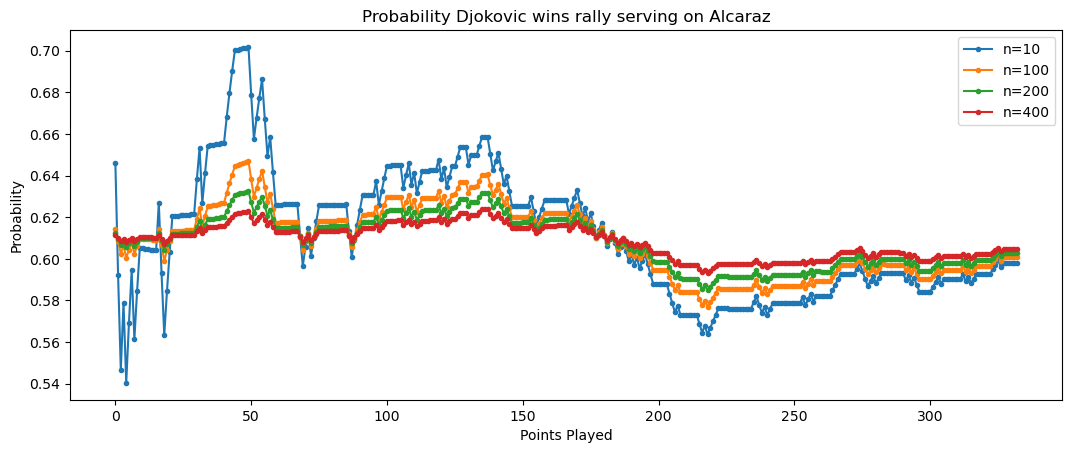

In [492]:
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = False

# Plotting the data
plt.plot(d_n_10, label='n=10', marker='o', markersize=3)
#plt.plot(dn_50, label='n=50', marker='o', markersize=3)
plt.plot(d_n_100, label='n=100', marker='o', markersize=3)
#plt.plot(dn_100, label='n=100', marker='o', markersize=3)
plt.plot(d_n_200, label='n=200', marker='o', markersize=3)
#plt.plot(d_n_300, label='n=300', marker='o', markersize=3)
plt.plot(d_n_400, label='n=400', marker='o', markersize=3)
#plt.plot(dn_150, label='n=150', marker='o', markersize=3)

# Adding labels and title
plt.xlabel('Points Played')
plt.ylabel('Probability')
plt.title('Probability Djokovic wins rally serving on Alcaraz')

# Adding legend
plt.legend()

# Save the plot
file_path = f'/Users/noahjillson/Desktop/MCM/data/Dynamic_Model_Predictions/Djokovic_Alcaraz_Varying_n/Djokovic_n'
plt.savefig(file_path)

fig = plt.gcf()

# Get the current size of the figure
fig_size = fig.get_size_inches()

# Double the width
fig.set_size_inches(fig_size[0] * 2, fig_size[1])

# Show the plot
plt.show()

In [379]:
# out_path = '/Users/noahjillson/Desktop/MCM/data/Alcaraz_v_Djokovic.csv'

# fieldnames = ['Carlos Alcaraz', 'Novak Djokovic']
# p_rally_dicts = [{'Carlos Alcaraz': a, 'Novak Djokovic': d} for a,d in zip(p_rally_alcaraz, p_rally_djokovic_2)]

# with open(out_path, mode='w', newline='') as file:
#     writer = csv.DictWriter(file, fieldnames=fieldnames)
#     writer.writeheader()
#     writer.writerows(p_rally_dicts)

In [494]:
Alcaraz_v_Djokovic = ('Carlos Alcaraz', 'Novak Djokovic')
Sinner_v_Djokovic = ('Jannik Sinner', 'Novak Djokovic')
Alcaraz_v_Medvedev = ('Carlos Alcaraz', 'Daniil Medvedev')

p_rally_Alcaraz_final = []
p_rally_Alcaraz_semi = []
p_rally_Djokovic_final = []
p_rally_Djokovic_semi = []
p_rally_Sinner = []
p_rally_Medvedev= []
for m in range(1,len(sequences[Alcaraz_v_Djokovic])):
    p_rally_Alcaraz_final.append(dynamic_model(sequences[Alcaraz_v_Djokovic][:m], p_dict[Alcaraz_v_Djokovic][0], 1))
    p_rally_Djokovic_final.append(dynamic_model(sequences[Alcaraz_v_Djokovic][:m], p_dict[Alcaraz_v_Djokovic][1], 2))

for m in range(1,len(sequences[Sinner_v_Djokovic])):
    p_rally_Sinner.append(dynamic_model(sequences[Sinner_v_Djokovic][:m], p_dict[Sinner_v_Djokovic][0], 1))
    p_rally_Djokovic_semi.append(dynamic_model(sequences[Sinner_v_Djokovic][:m], p_dict[Sinner_v_Djokovic][1], 2))


for m in range(1,len(sequences[Alcaraz_v_Medvedev])):
    p_rally_Alcaraz_semi.append(dynamic_model(sequences[Alcaraz_v_Medvedev][:m], p_dict[Alcaraz_v_Medvedev][0], 1))
    p_rally_Medvedev.append(dynamic_model(sequences[Alcaraz_v_Medvedev][:m], p_dict[Alcaraz_v_Medvedev][1], 2))

0.9900990099009901
0.9900990099009901
0.9803921568627451
0.9803921568627451
0.970873786407767
0.970873786407767
0.9615384615384616
0.9615384615384616
0.9523809523809523
0.9523809523809523
0.9433962264150944
0.9433962264150944
0.9345794392523364
0.9345794392523364
0.9259259259259259
0.9259259259259259
0.9174311926605505
0.9174311926605505
0.9090909090909091
0.9090909090909091
0.9009009009009009
0.9009009009009009
0.8928571428571429
0.8928571428571429
0.8849557522123894
0.8849557522123894
0.8771929824561403
0.8771929824561403
0.8695652173913043
0.8695652173913043
0.8620689655172413
0.8620689655172413
0.8547008547008547
0.8547008547008547
0.847457627118644
0.847457627118644
0.8403361344537815
0.8403361344537815
0.8333333333333334
0.8333333333333334
0.8264462809917356
0.8264462809917356
0.819672131147541
0.819672131147541
0.8130081300813008
0.8130081300813008
0.8064516129032258
0.8064516129032258
0.8
0.8
0.7936507936507936
0.7936507936507936
0.7874015748031497
0.7874015748031497
0.78125
0.

In [497]:
len(p_rally_Djokovic_final)
len(p_rally_Alcaraz_final)

333

### Calculating Probability of winning a Game

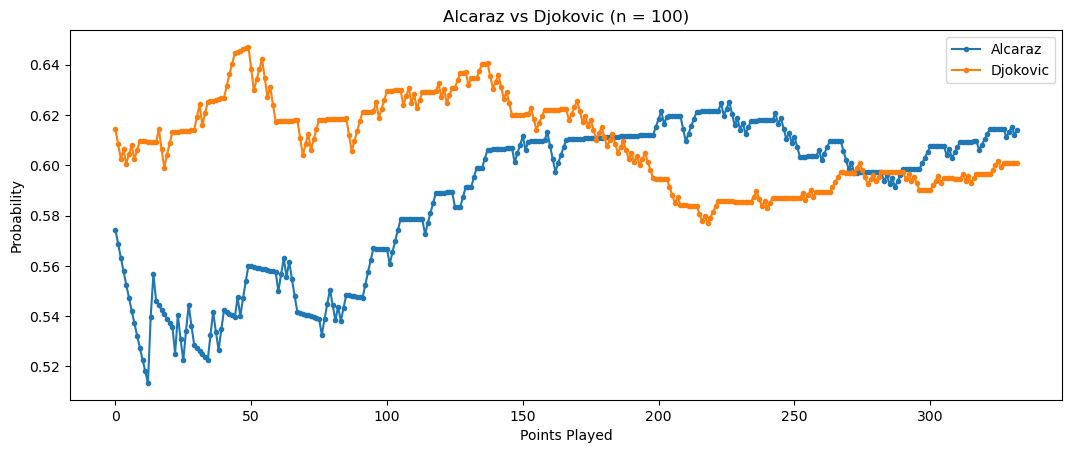

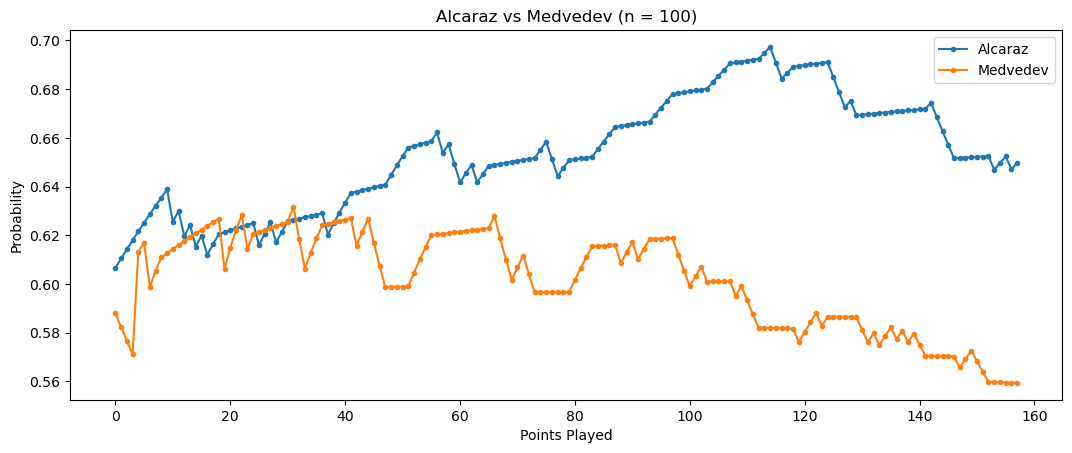

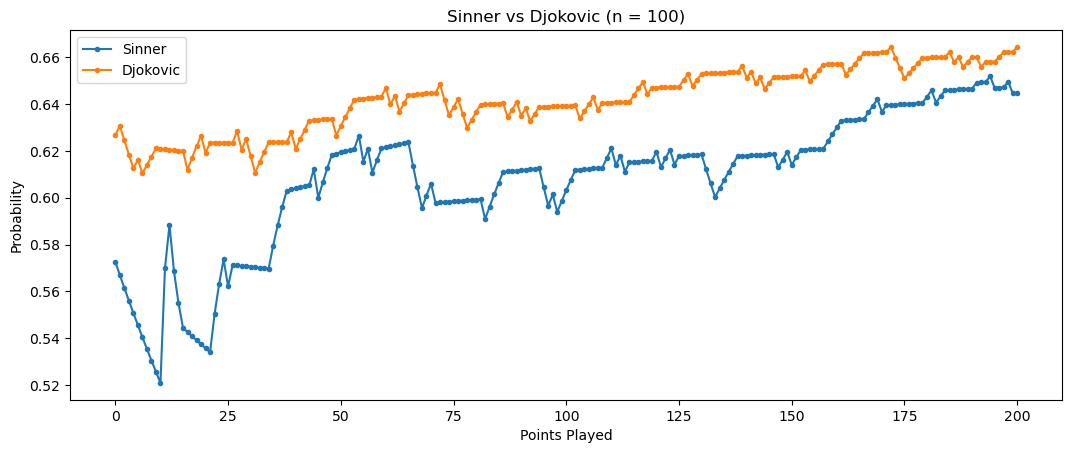

In [500]:
import matplotlib.pyplot as plt

# p_rally_Alcaraz_final
# p_rally_Alcaraz_semi
# p_rally_Djokovic_final
# p_rally_Djokovic_semi
# p_rally_Sinner
# p_rally_Medvedev

plt.plot(p_rally_Alcaraz_final, label='Alcaraz', marker='o', markersize=3)
plt.plot(p_rally_Djokovic_final, label='Djokovic', marker='o', markersize=3)

plt.xlabel('Points Played')
plt.ylabel('Probability')
plt.title(f'Alcaraz vs Djokovic (n = {n})')

fig = plt.gcf()
fig_size = fig.get_size_inches()
fig.set_size_inches(fig_size[0] * 2, fig_size[1])

plt.legend()

file_path = f'/Users/noahjillson/Desktop/MCM/data/Dynamic_Model_Predictions/Alcaraz_v_Djokovic_wide'
plt.savefig(file_path)
plt.show()



plt.plot(p_rally_Alcaraz_semi, label='Alcaraz', marker='o', markersize=3)
plt.plot(p_rally_Medvedev, label='Medvedev', marker='o', markersize=3)

plt.xlabel('Points Played')
plt.ylabel('Probability')
plt.title(f'Alcaraz vs Medvedev (n = {n})')

fig = plt.gcf()
fig_size = fig.get_size_inches()
fig.set_size_inches(fig_size[0] * 2, fig_size[1])

plt.legend()

file_path = f'/Users/noahjillson/Desktop/MCM/data/Dynamic_Model_Predictions/Alcaraz_v_Medvedev_wide'
plt.savefig(file_path)
plt.show()



plt.plot(p_rally_Sinner, label='Sinner', marker='o', markersize=3)
plt.plot(p_rally_Djokovic_semi, label='Djokovic', marker='o', markersize=3)

plt.xlabel('Points Played')
plt.ylabel('Probability')
plt.title(f'Sinner vs Djokovic (n = {n})')

fig = plt.gcf()
fig_size = fig.get_size_inches()
fig.set_size_inches(fig_size[0] * 2, fig_size[1])

plt.legend()

file_path = f'/Users/noahjillson/Desktop/MCM/data/Dynamic_Model_Predictions/Sinner_v_Djokovic_wide'
plt.savefig(file_path)
plt.show()

In [381]:
# for k in p_dict:
#     p1 = []
#     p2 = []
#     for m in range(1,len(sequences[k])):
#         p1.append(dynamic_model(sequences[k][:m], p_dict[k][0], 1))
#         p2.append(dynamic_model(sequences[k][:m], p_dict[k][1], 2))

#     plt.plot(p1, label=f'Probability Rally {k[0]}', marker='o', markersize=3)
#     plt.plot(p2, label=f'Probability Rally {k[1]}', marker='x', markersize=3)

#     # Adding labels and title
#     plt.xlabel('Points Played')
#     plt.ylabel('Probability')
#     plt.title(f'Probability Rally While Serving ({k[0]} vs {k[1]})')

#     # Adding legend
#     plt.legend()

#     # Save the plot
#     file_path = f'/Users/noahjillson/Desktop/MCM/data/Dynamic_Model_Predictions/{k[0].replace(" ", "_")}_VS_{k[1].replace(" ", "_")}'
#     plt.savefig(file_path)

#     # Show the plot
#     plt.show()

##### Defining Our Function/Model

In [270]:
# P_GA represents the probability that player A wins the game 
# P_RA represents the probability that player A wins the rally (point) while serving
# game_score_tup gives the score in (player1, player2)

def P_GA_40(P_RA, game_score_tup, player_idx, opp_idx):
    if (int(game_score_tup[opp_idx]) == 0):
        return P_RA**(4 - int(game_score_tup[player_idx]))
    return 0

def P_GA_41(P_RA, q_ra, game_score_tup, player_idx, opp_idx):
    coefficient_table = {
        (0,0): 4,
        (1,0): 3,
        (2,0): 2,
        (3,0): 1,
        (3,1): 1,
        (1,1): 1,
        (2,1): 1,
        (0,1): 1
    }
    lookup_tup = game_score_tup
    #print(game_score_tup, (game_score_tup[1], game_score_tup[0]))
    if player_idx == 1:
        lookup_tup = (game_score_tup[1], game_score_tup[0])


    if (int(game_score_tup[opp_idx]) <= 1):
        return coefficient_table[lookup_tup] * ((P_RA**(4 - int(game_score_tup[player_idx]))) * q_ra)
    return 0

def P_GA_42(P_RA, q_ra, game_score_tup, player_idx, opp_idx):
    coefficient_table = {
        (3,2): 1,
        (2,2): 1,
        (1,2): 1,
        (0,2): 1,
        (0,0): 10,
        (1,0): 6,
        (0,1): 4,
        (1,1): 3,
        (2,1): 2,
        (3,1): 1,
        (2,0): 3,
        (3,0): 1
    }
    lookup_tup = game_score_tup
    if player_idx == 1:
        lookup_tup = (game_score_tup[1], game_score_tup[0])

    if (int(game_score_tup[opp_idx]) <= 2):
        return coefficient_table[lookup_tup] * ((P_RA**(4 - int(game_score_tup[player_idx]))) * (q_ra**(2 - int(game_score_tup[opp_idx]))))
    return 0

def P_GA_33_prime(P_RA, q_ra, game_score_tup, player_idx, opp_idx):
    coefficient_table = {
        (0,0): 20,
        (1,0): 10,
        (0,1): 10,
        (2,0): 4,
        (0,2): 4,
        (3,0): 1,
        (0,3): 1,
        (1,1): 12,
        (2,1): 3,
        (1,2): 3,
        (2,2): 2,
        (1,3): 1,
        (3,1): 1,
        (3,2): 1,
        (2,3): 1,
        (3,3): 1
    }
    lookup_tup = game_score_tup
    if player_idx == 1:
        lookup_tup = (game_score_tup[1], game_score_tup[0])

    if lookup_tup[0] < 3 and lookup_tup[1] < 3:
        print(int(game_score_tup[player_idx]), int(game_score_tup[opp_idx]))
        return coefficient_table[lookup_tup] * (P_RA**(3 - int(game_score_tup[player_idx]))) * (q_ra**(3-int(game_score_tup[opp_idx])))
    elif lookup_tup[0] == 3 and lookup_tup[1] ==  3:
        #prar**2+ prar**2*qwr + prar**2*qwr*prar*qwr + prar**2*qwr*prar*qwr*prar*qwr
        return P_RA**2 + P_RA**2*q_ra + P_RA**3 * q_ra**2 + P_RA**4 * q_ra**3 # ( 20*((P_RA*q_ra)**3)*(P_RA**2) ) / (1 - 2*P_RA*q_ra) #P_RA ** 2
    elif lookup_tup[0] == 3 and lookup_tup[1] == 0:
        return q_ra**3
    elif lookup_tup[0] == 3 and lookup_tup[1] == 1:
        return q_ra**2
    elif lookup_tup[0] == 3 and lookup_tup[1] == 2:
        return q_ra
    else:
        if lookup_tup[0] == 4:
            return P_RA
        else:
            return (P_RA ** 2) + P_RA * (P_RA**2 + P_RA**2*q_ra + P_RA**3 * q_ra**2 + P_RA**4 * q_ra**3) # * q_ra # return P_RA * P_GA_33(P_RA, q_ra, (3,3), player_idx, opp_idx)

def P_GA_33_primeprime(P_RA, q_ra, game_score_tup, player_idx, opp_idx):
    coefficient_table = {
        (0,0): 20,
        (1,0): 10,
        (0,1): 10,
        (2,0): 4,
        (0,2): 4,
        (3,0): 1,
        (0,3): 1,
        (1,1): 12,
        (2,1): 3,
        (1,2): 3,
        (2,2): 2,
        (1,3): 1,
        (3,1): 1,
        (3,2): 1,
        (2,3): 1,
        (3,3): 1
    }
    lookup_tup = game_score_tup
    if player_idx == 1:
        lookup_tup = (game_score_tup[1], game_score_tup[0])

    if lookup_tup[0] < 3 and lookup_tup[1] < 3:
        #print(int(game_score_tup[player_idx]), int(game_score_tup[opp_idx]))
        return coefficient_table[lookup_tup] * (P_RA**(3 - int(game_score_tup[player_idx]))) * (q_ra**(3-int(game_score_tup[opp_idx])))
    elif lookup_tup[0] == 3 and lookup_tup[1] ==  3:
        return 1 # ( 20*((P_RA*q_ra)**3)*(P_RA**2) ) / (1 - 2*P_RA*q_ra) #P_RA ** 2
    elif lookup_tup[0] == 3 and lookup_tup[1] == 0:
        return q_ra**3
    elif lookup_tup[0] == 3 and lookup_tup[1] == 1:
        return q_ra**2
    elif lookup_tup[0] == 3 and lookup_tup[1] == 2:
        return q_ra
    else:
        if lookup_tup[1] == 4:
            return P_RA
        else:
            return q_ra # * q_ra # return P_RA * P_GA_33(P_RA, q_ra, (3,3), player_idx, opp_idx)

def P_GA_33(P_RA, q_ra, game_score_tup, player_idx, opp_idx):
    coefficient_table = {
        (0,0): 20,
        (1,0): 10,
        (0,1): 10,
        (2,0): 4,
        (0,2): 4,
        (3,0): 1,
        (0,3): 1,
        (1,1): 12,
        (2,1): 3,
        (1,2): 3,
        (2,2): 2,
        (1,3): 1,
        (3,1): 1,
        (3,2): 1,
        (2,3): 1,
        (3,3): 1
    }
    lookup_tup = game_score_tup
    if player_idx == 1:
        lookup_tup = (game_score_tup[1], game_score_tup[0])

    if lookup_tup[0] <= 3 and lookup_tup[1] <= 3:
        #print(int(game_score_tup[player_idx]), int(game_score_tup[opp_idx]))
        return coefficient_table[lookup_tup] * (P_RA**(3 - int(game_score_tup[player_idx]))) * (q_ra**(3-int(game_score_tup[opp_idx])))
    elif lookup_tup[0] == 4 and lookup_tup[1] == 3:
        return q_ra
    else:
        return 0

def P_GAAD(P_RA, q_ra, game_score_tup, player_idx, opp_idx):
    lookup_tup = game_score_tup
    if player_idx == 1:
        lookup_tup = (game_score_tup[1], game_score_tup[0])

    if lookup_tup[0] == 4:
        return P_RA
    elif lookup_tup[1] == 4:
        return q_ra
    else:
        return 0
    


def P_GA(P_RA, game_score_tup, player_idx, opp_idx):
    q_ra = 1 - P_RA
    print(P_GA_40(P_RA, game_score_tup, player_idx, opp_idx), P_GA_41(P_RA, q_ra, game_score_tup, player_idx, opp_idx), P_GA_42(P_RA, q_ra, game_score_tup, player_idx, opp_idx), (((P_RA**2)  * P_GA_33(P_RA, q_ra, game_score_tup, player_idx, opp_idx)) / (1 - 2*P_RA*q_ra)), P_GAAD(P_RA, q_ra, game_score_tup, player_idx, opp_idx))
    return P_GA_40(P_RA, game_score_tup, player_idx, opp_idx) + P_GA_41(P_RA, q_ra, game_score_tup, player_idx, opp_idx) + P_GA_42(P_RA, q_ra, game_score_tup, player_idx, opp_idx) + (((P_RA**2)  * P_GA_33(P_RA, q_ra, game_score_tup, player_idx, opp_idx)) / (1 - 2*P_RA*q_ra)) + P_GAAD(P_RA, q_ra, game_score_tup, player_idx, opp_idx)


def P_GA_prime(P_RA, game_score_tup, player_idx, opp_idx):
    q_ra = 1 - P_RA
    print(P_GA_40(P_RA, game_score_tup, player_idx, opp_idx), P_GA_41(P_RA, q_ra, game_score_tup, player_idx, opp_idx), P_GA_42(P_RA, q_ra, game_score_tup, player_idx, opp_idx), P_GA_33(P_RA, q_ra, game_score_tup, player_idx, opp_idx))
    return P_GA_40(P_RA, game_score_tup, player_idx, opp_idx) + P_GA_41(P_RA, q_ra, game_score_tup, player_idx, opp_idx) + P_GA_42(P_RA, q_ra, game_score_tup, player_idx, opp_idx) + P_GA_33(P_RA, q_ra, game_score_tup, player_idx, opp_idx)

def P_GA_1(P_RA):
    print(P_RA)
    q_ra = 1 - P_RA
    return (P_RA**4) * (1 + 4*q_ra + 10*(q_ra ** 2)) + ( 20*((P_RA*q_ra)**3)*(P_RA**2) ) / (1 - 2*P_RA*q_ra)

#### Separating Score Sequences Into Game Sequences

In [243]:
def get_score_tup(point):
    score_map = {
        ('0', '0') : (0, 0),
        ('15', '0') : (1, 0),
        ('30', '0') : (2, 0),
        ('40', '0') : (3, 0),
        ('0', '15') : (0, 1),
        ('15', '15') : (1, 1),
        ('30', '15') : (2, 1),
        ('40', '15') : (3, 1),
        ('0', '30') : (0, 2),
        ('15', '30') : (1, 2),
        ('30', '30') : (2, 2),
        ('40', '30') : (3, 2),
        ('0', '40') : (0, 3),
        ('15', '40') : (1, 3),
        ('30', '40') : (2, 3),
        ('40', '40') : (3, 3),
        ('AD', '40') : (4, 3),
        ('40', 'AD') : (3, 4),
    }

    return score_map[(point['p1_score'], point['p2_score'])]

In [244]:
def score_seq_to_game_seq(score_seq):
    game_no = '1'
    game_seq = []
    curr_game = []

    for r in score_seq:
        if game_no != r['game_no']:
            game_no = r['game_no']
            game_seq.append(curr_game)
            curr_game = [r]
        else:
            curr_game.append(r)
    
    game_seq.append(curr_game)
    return game_seq

In [245]:
games_sinner_djokovic = score_seq_to_game_seq(sequences[sinner_v_djokovic])

In [271]:
# Djokovic begins the match by serving (game 0)
# p_rally_djokovic
# games_sinner_djokovic


points_played = 0
P_games = []
# for idg, g in enumerate(games):
#     for r in g:
#         points_played += 1
#         P_GA(p_rally_djokovic[points_played])
g = games_sinner_djokovic[0]
for r in g:
    points_played += 1
    P_games.append(P_GA(p_rally_djokovic[points_played], get_score_tup(r), 1, 0))
    


0.15807050542964923 0.2336028532598118 0.21576721769977905 0.18822963304244175 0
0.24345963839401058 0.27431691787654583 0.20605680111817887 0.15168898397688568 0
0.38243628069512897 0.2918644105678082 0.16705691599380812 0.0995416336286484 0
0 0.1453755015453813 0.2907510030907626 0.19703946088686672 0
0 0 0.3796779095904695 0.3407795073268274 0
0 0 0 0.4337488711506854 0
0 0 0 0.7167823524627812 0
0 0 0 0.0 0.3824303662385321
0 0 0 0.7286893388935555 0
0 0 0 0.27615689452065767 0.6208566673873873


[0.7956702094316819, 0.8755223413656209, 0.9408992408853938, 0.6331659655230106, 0.7204574169172968, 0.4337488711506854, 0.7167823524627812, 0.3824303662385321, 0.7286893388935555, 0.897013561908045]
[0.62688208, 0.6305400988235295, 0.6244183502912621, 0.6184143276923078, 0.6125246674285715, 0.6161800950943397, 0.6104214026168224, 0.6140286118518519, 0.6175696337614679, 0.6210462734545454]


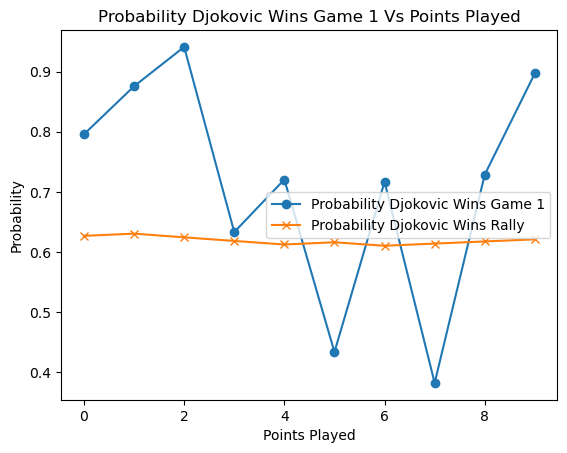

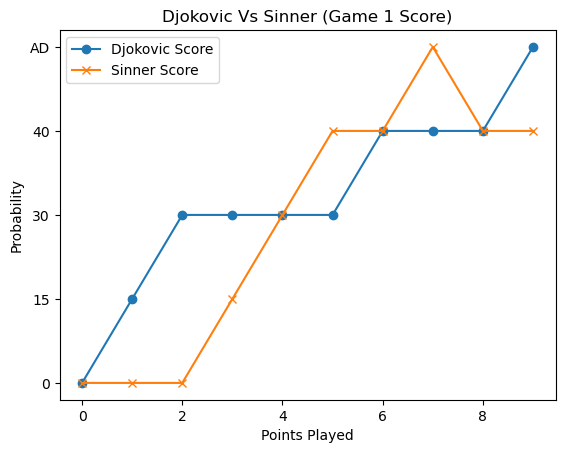

In [269]:
print(P_games)
print(p_rally_djokovic[:len(P_games)])

plt.plot(P_games, label='Probability Djokovic Wins Game 1', marker='o')
plt.plot(p_rally_djokovic[:len(P_games)], label='Probability Djokovic Wins Rally', marker='x')

# Adding labels and title
plt.xlabel('Points Played')
plt.ylabel('Probability')
plt.title('Probability Djokovic Wins Game 1 Vs Points Played')

# Adding legend
plt.legend()

# Show the plot
plt.show()

d_score = []
s_score = []
for r in g:
    d_score.append(r['p2_score'])
    s_score.append(r['p1_score'])
plt.plot(d_score, label='Djokovic Score', marker='o')
plt.plot(s_score, label='Sinner Score', marker='x')

# Adding labels and title
plt.xlabel('Points Played')
plt.ylabel('Probability')
plt.title('Djokovic Vs Sinner (Game 1 Score)')

# Adding legend
plt.legend()

# Show the plot
plt.show()

In [240]:
P_GA(p_rally_djokovic[7], (3,3), 1, 0)
qwr = (1 - p_rally_djokovic[7])
prar = p_rally_djokovic[7]
( 20*((p_rally_djokovic[7]*qwr)**3)*(p_rally_djokovic[7]**2) ) / (1 - 2*p_rally_djokovic[7]*qwr)

prar**2+ prar**2*qwr + prar**2*qwr*prar*qwr + prar**2*qwr*prar*qwr*prar*qwr



0.5652167258174443

In [241]:
print(P_GA(p_rally_djokovic[0], (0,0), 1, 0))
print(P_GA(p_rally_djokovic[1], (0,1), 1, 0))
print(P_GA(p_rally_djokovic[2], (0,2), 1, 0))
print(P_GA(p_rally_djokovic[3], (1,2), 1, 0))
print(P_GA(p_rally_djokovic[4], (2,2), 1, 0))
print(P_GA(p_rally_djokovic[5], (3,2), 1, 0))
print(P_GA(p_rally_djokovic[6], (3,3), 1, 0))
print(P_GA(p_rally_djokovic[7], (4,3), 1, 0))
print(P_GA(p_rally_djokovic[8], (3,3), 1, 0))
print(P_GA(p_rally_djokovic[9], (3,4), 1, 0))

0 0
0.7488558406246677
1 0
0.8514969170426536
2 0
0.9243567024836529
2 1
0.5920266682251213
2 2
0.6425498707892362
0.21801809898158261
0.5605067933519096
0.21815748426831022
0.5698319253002069
0.35670098445084036


In [231]:
print(P_GA(p_rally_djokovic[3], (1,2), 1, 0))
print(P_GA(p_rally_djokovic[4], (2,2), 1, 0))

(1 - p_rally_djokovic[4])**3

(p_rally_djokovic[4])*((1 - p_rally_djokovic[4])**1)

3* (p_rally_djokovic[3]**(3 - 2)) * ((1 - p_rally_djokovic[3])**(3-1))
4 * (p_rally_djokovic[4]**(3 - 2)) * ((1 - p_rally_djokovic[4])**(3-2))

2 1
0 0.1459322052839041 0.2918644105678082 0.270137525139824
2 1
0.7079341409915363
2 2
0 0 0.3751864682084821 0.4746763984401788
2 2
0.849862866648661


0.9493527968803576